/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")


INFO: Auto-setting vmin to -1.837e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.316e+01 [aplpy.core]


/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")


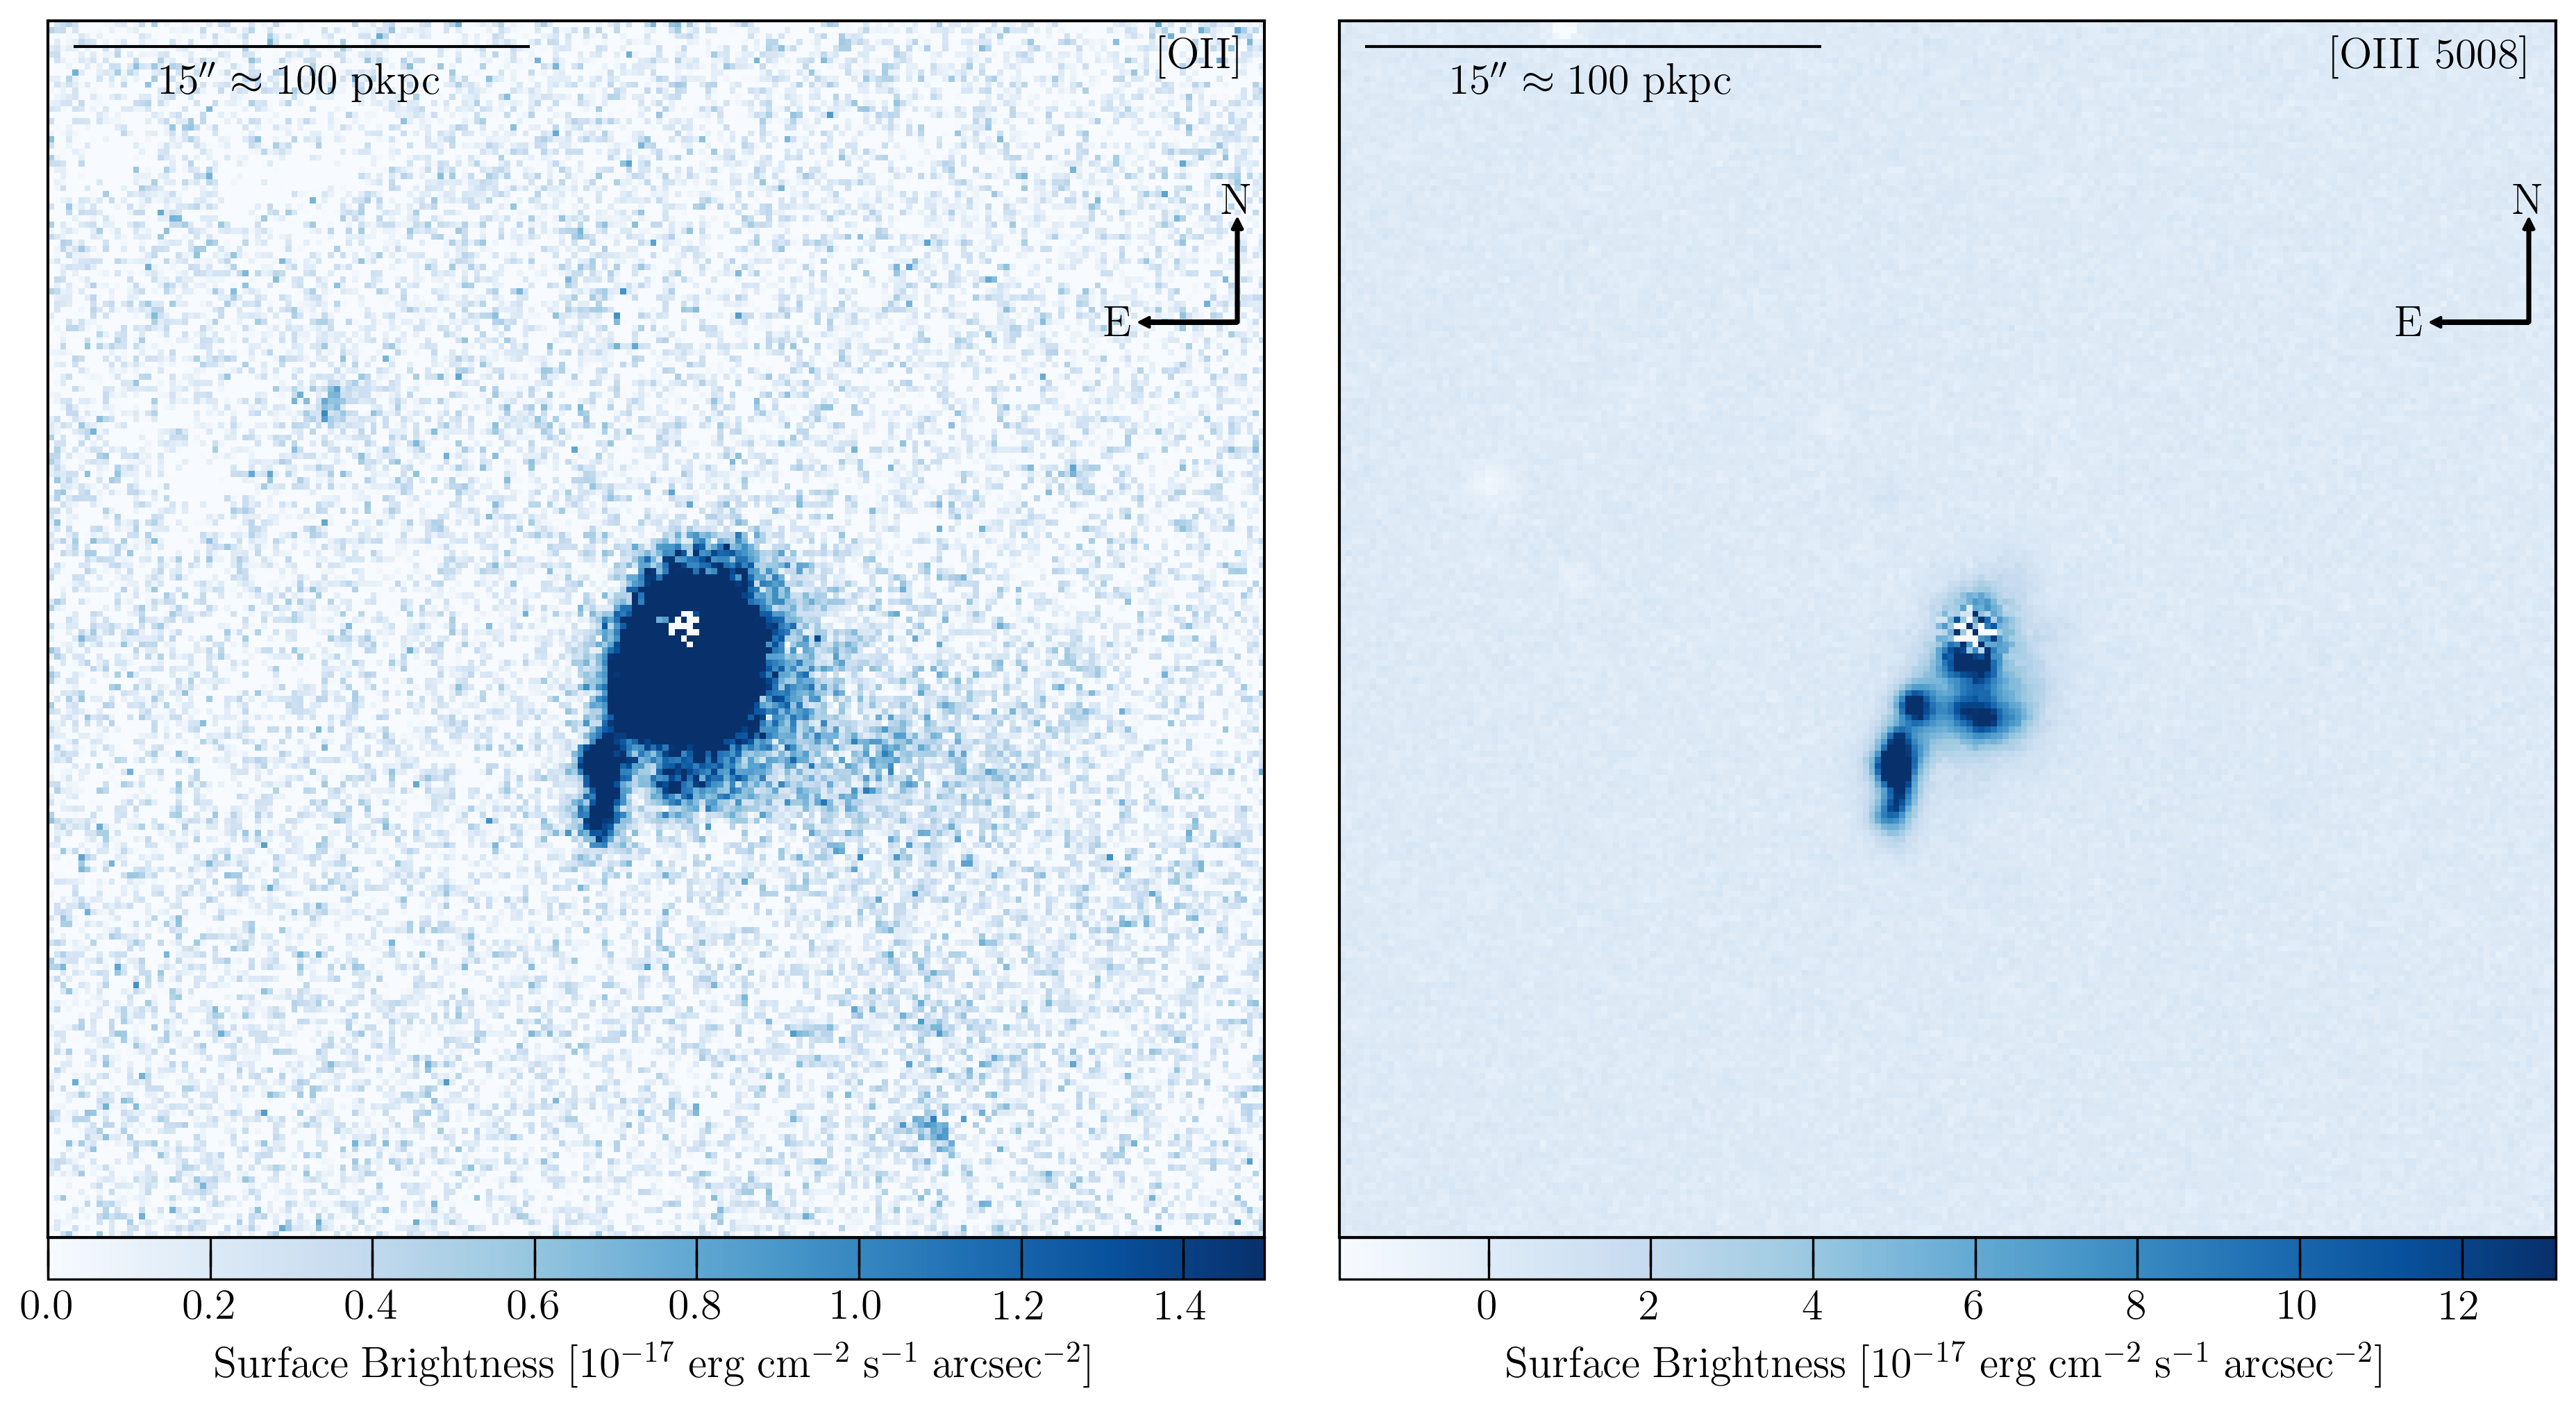

In [6]:
import os
import aplpy
import numpy as np
import matplotlib as mpl
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import cm
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
from matplotlib.colors import ListedColormap
rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})
rc('text', usetex=True)
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10

Blues = cm.get_cmap('Blues', 256)
Reds = cm.get_cmap('Reds', 256)
newcolors = Blues(np.linspace(0, 1, 256))
newcolors_red = Reds(np.linspace(0, 1, 256))
newcmp = ListedColormap(newcolors)


# Convert Fits file into correct form
def ConvertFits(filename='image_OIII_5008_line_SB_offset'):
    path = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', filename + '.fits')
    data, hdr = fits.getdata(path, 1, header=True)
    fits.writeto('/Users/lzq/Dropbox/Data/CGM/' + filename + '_revised.fits', data, overwrite=True)
    data1, hdr1 = fits.getdata('/Users/lzq/Dropbox/Data/CGM/' + filename + '_revised.fits', 0, header=True)
    hdr1['BITPIX'], hdr1['NAXIS'], hdr1['NAXIS1'], hdr1['NAXIS2'] = hdr['BITPIX'], hdr['NAXIS'], hdr['NAXIS1'], hdr['NAXIS2']
    hdr1['CRPIX1'], hdr1['CRPIX2'], hdr1['CTYPE1'], hdr1['CTYPE2'] = hdr['CRPIX1'], hdr['CRPIX2'], hdr['CTYPE1'], hdr['CTYPE2']
    hdr1['CRVAL1'], hdr1['CRVAL2'], hdr1['LONPOLE'], hdr1['LATPOLE'] = hdr['CRVAL1'], hdr['CRVAL2'], hdr['LONPOLE'], hdr['LATPOLE']
    hdr1['CSYER1'], hdr1['CSYER2'], hdr1['MJDREF'], hdr1['RADESYS'] = hdr['CSYER1'], hdr['CSYER2'], hdr['MJDREF'], hdr['RADESYS']
    hdr1['CD1_1'], hdr1['CD1_2'], hdr1['CD2_1'], hdr1['CD2_2'] =  hdr['CD1_1'], hdr['CD1_2'], hdr['CD2_1'], hdr['CD2_2']
    # Rescale the data by 1e17
    fits.writeto('/Users/lzq/Dropbox/Data/CGM/' + filename + '_revised.fits', data1 * 1e17, hdr1, overwrite=True)
# ConvertFits(filename='image_OII_line_SB_offset')


# QSO property
z = 0.6282144177077355
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
d_l = cosmo.angular_diameter_distance(z=z)
ratio = (1 * u.radian).to(u.arcsec).value
arcsec_15 = (15 * d_l / ratio).to(u.kpc).value
# print(arcsec_15)

path_OII = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'image_OII_line_SB_offset_revised.fits')
path_OIII_4960 = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'image_OIII_4960_line_SB_offset_revised.fits')
path_OIII_5008 = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'image_OIII_5008_line_SB_offset_revised.fits')

fig = plt.figure(figsize=(16, 8), dpi=300)
plt.subplots_adjust(wspace=0.)
gc = aplpy.FITSFigure(path_OII, figure=fig, subplot=(1, 2, 1), north=True)
gc.set_system_latex(True)
gc.show_colorscale(vmin=0, vmax=1.5, cmap=newcmp)
gc.add_colorbar()
gc.ticks.set_length(30)
# gc.show_regions('/Users/lzq/Dropbox/Data/CGM/galaxy_list.reg')
gc.colorbar.set_location('bottom')
gc.colorbar.set_pad(0.0)
gc.colorbar.set_axis_label_text(r'$\mathrm{Surface \; Brightness \; [10^{-17} \; erg \; cm^{-2} \; s^{-1} \; arcsec^{-2}]}$')
gc.colorbar.set_font(size=15)
gc.colorbar.set_axis_label_font(size=15)
gc.add_scalebar(length=15 * u.arcsecond)
gc.scalebar.set_corner('top left')
gc.scalebar.set_label(r"$15'' \approx 100 \mathrm{\; pkpc}$")
gc.scalebar.set_font_size(15)
gc.ticks.hide()
gc.tick_labels.hide()
gc.axis_labels.hide()
gc.add_label(0.95, 0.97, r'[OII]', size=15, relative=True)
xw, yw = gc.pixel2world(195, 150)
gc.show_arrows(xw, yw, -0.00005 * yw, 0, color='k')
gc.show_arrows(xw, yw, 0, -0.00005 * yw, color='k')
gc.add_label(0.9775, 0.85, r'N', size=15, relative=True)
gc.add_label(0.88, 0.75, r'E', size=15, relative=True)

# gc = aplpy.FITSFigure(path_OIII_4960, figure=fig, subplot=(1, 3, 2), north=True)
# gc.set_system_latex(True)
# gc.show_colorscale(cmap=newcmp)
# gc.add_colorbar()
# gc.ticks.set_length(30)
# # gc.show_regions('/Users/lzq/Dropbox/Data/CGM/galaxy_list.reg')
# gc.colorbar.set_location('bottom')
# gc.colorbar.set_pad(0.0)
# gc.colorbar.set_axis_label_text(r'$\mathrm{Surface \; Brightness \; [10^{-17} \; erg \; cm^{-2} \; s^{-1} \; arcsec^{-2}]}$')
# gc.colorbar.set_font(size=15)
# gc.colorbar.set_axis_label_font(size=15)
# gc.add_scalebar(length=15 * u.arcsecond)
# gc.scalebar.set_corner('top left')
# gc.scalebar.set_label(r"$15'' \approx 102 \mathrm{\; pkpc}$")
# gc.scalebar.set_font_size(15)
# gc.ticks.hide()
# gc.tick_labels.hide()
# gc.axis_labels.hide()
# gc.add_label(0.90, 0.97, r'[OIII 4960]', size=15, relative=True)
# xw, yw = gc.pixel2world(195, 150)
# gc.show_arrows(xw, yw, -0.00005 * yw, 0, color='k')
# gc.show_arrows(xw, yw, 0, -0.00005 * yw, color='k')
# gc.add_label(0.9775, 0.85, r'N', size=15, relative=True)
# gc.add_label(0.88, 0.75, r'E', size=15, relative=True)
# # plt.savefig('/Users/lzq/Dropbox/Data/CGM_plots/OIII_image.pdf', bbox_inches='tight')

gc = aplpy.FITSFigure(path_OIII_5008, figure=fig, subplot=(1, 2, 2), north=True)
gc.set_system_latex(True)
gc.show_colorscale(cmap=newcmp)
gc.add_colorbar()
gc.ticks.set_length(30)
# gc.show_regions('/Users/lzq/Dropbox/Data/CGM/galaxy_list.reg')
gc.colorbar.set_location('bottom')
gc.colorbar.set_pad(0.0)
gc.colorbar.set_axis_label_text(r'$\mathrm{Surface \; Brightness \; [10^{-17} \; erg \; cm^{-2} \; s^{-1} \; arcsec^{-2}]}$')
gc.colorbar.set_font(size=15)
gc.colorbar.set_axis_label_font(size=15)
gc.add_scalebar(length=15 * u.arcsecond)
gc.scalebar.set_corner('top left')
gc.scalebar.set_label(r"$15'' \approx 100 \mathrm{\; pkpc}$")
gc.scalebar.set_font_size(15)
gc.ticks.hide()
gc.tick_labels.hide()
gc.axis_labels.hide()
gc.add_label(0.90, 0.97, r'[OIII 5008]', size=15, relative=True)
xw, yw = gc.pixel2world(195, 150)
gc.show_arrows(xw, yw, -0.00005 * yw, 0, color='k')
gc.show_arrows(xw, yw, 0, -0.00005 * yw, color='k')
gc.add_label(0.9775, 0.85, r'N', size=15, relative=True)
gc.add_label(0.88, 0.75, r'E', size=15, relative=True)
fig.savefig('/Users/lzq/Dropbox/Data/CGM_plots/Narrow_band_image_talk.pdf', bbox_inches='tight')



In [11]:
# Make a movie

from matplotlib import animation
from mpdaf.obj import Cube, WCS, WaveCoord, iter_spe

# def data():

path_cube_OII = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'CUBE_OII_line_offset.fits')

cube = Cube(path_cube_OII)


